In [ ]:
import numpy as np
import matplotlib.pyplot as plt

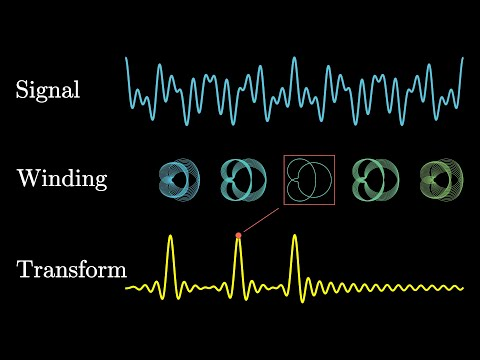

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('spUNpyF58BY')

## Setting up the signal

In [ ]:
pi = np.pi
freq = 3
t = np.arange(0,2,0.001)

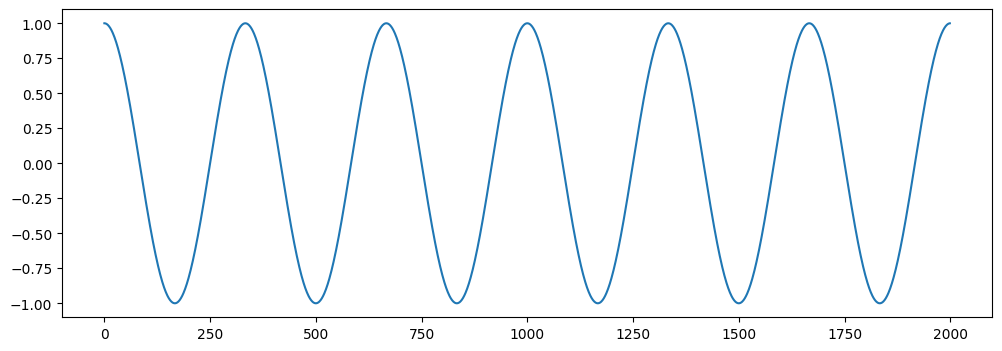

In [ ]:
x = np.cos(2*pi*freq*t)
plt.plot(x)

## Implementing the Fourier Transform formula

![](https://media.geeksforgeeks.org/wp-content/uploads/20190725091325/fourier-transform-fft.png)

In [ ]:
e = np.e
j = 1j
ePower = lambda k: np.power(e, -j*2*pi*k*t)

In [ ]:
X = lambda k: np.sum(x * ePower(k))

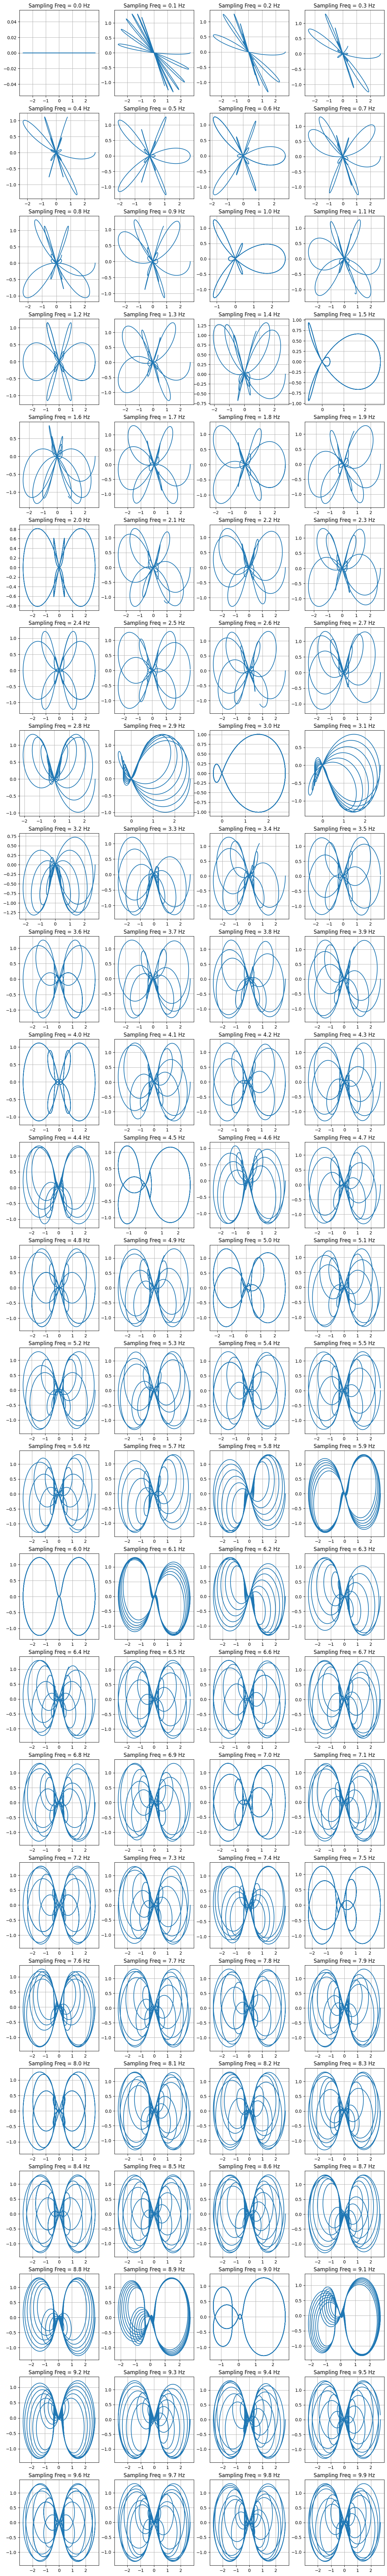

In [ ]:
plt.rcParams["figure.figsize"] = (15,110)
mean_list = []

min_freq_range = 0.0
max_freq_range = 10.0
sf_list = np.arange(min_freq_range, max_freq_range, 0.1)
for i, sf in enumerate(sf_list):
  Xs = x * np.power(e, ePower(sf))
  real = [ele.real for ele in Xs]
  imag = [ele.imag for ele in Xs]
  plt.subplot(int(len(sf_list)/4)+1, 4, i+1)
  plt.plot(real, imag)
  plt.grid()
  plt.title("Sampling Freq = "+str(round(sf, 2))+" Hz")
  x_mean = np.sum(real)
  mean_list.append(x_mean)

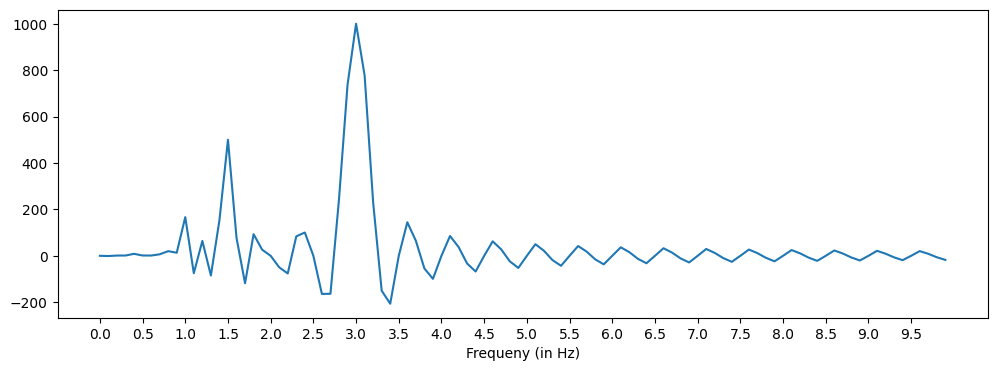

In [ ]:
plt.rcParams["figure.figsize"] = (12,4)
plt.xlabel("Frequeny (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
plt.plot(sf_list,mean_list)

In [ ]:
import scipy.fft

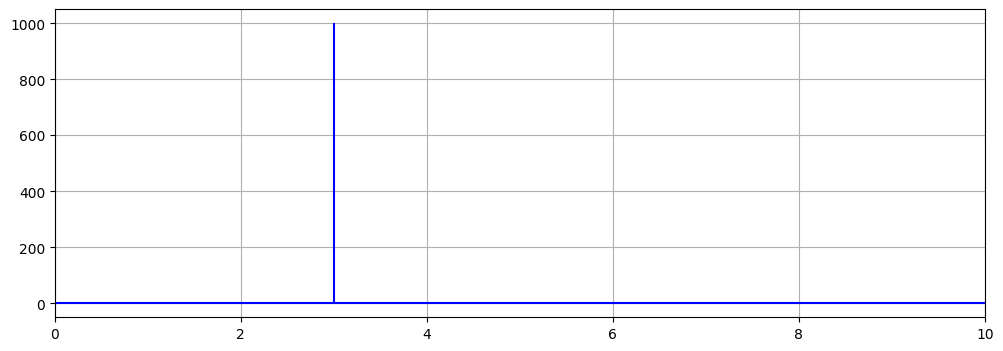

In [223]:
Xs = scipy.fft.fft(x)
NXs = len(Xs)
nXs = np.arange(NXs)
sr = 1000
T = NXs/sr
freq = nXs/T

plt.stem(freq, np.abs(Xs), 'b', markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)
plt.grid()